---------------------
# Project: PCA and tSNE

--------------------

-----------------------
## Objective
-------------------------


In this project, we aim to generate and visualise the pca and tsne embeddings for iris flower(read more about the plant <a href = "https://en.wikipedia.org/wiki/Iris_(plant)">here</a>) dataset.

<br>

---------------------
## Background and about data
--------------------

The data has 3 types of the iris flower -  
- Iris-Setosa
- Iris-Versicolour
- Iris-Virginica

Four different features are described for these 3 types which are-

- sepal length (cm)	
- sepal width (cm)	
- petal length (cm)	
- petal width (cm)

<br>

--------------------
## References
---------------------

- Documentation PCA - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- Documnetation tSNE - https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html



### Import the required packages

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load the iris data from sklearn.datasets

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# Now that we have loaded the data, let us extract the features, targets and feature names

iris_x = iris.data
iris_y = iris.target
column_names = iris.feature_names

### Create the iris_df
- Using the values above, create a dataframe using the hints below.
- The final dataframe is printed as a hint

In [8]:
#Passing the iris data to create a dataframe without the target column

iris_df = pd.DataFrame(iris_x)
iris_df.columns = column_names

# Adding the target column to the dataframe using the iris target

iris_df['Y'] = iris_y
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### We have observed that there are 3 types of flowers in this dataset represented by 0,1 and 2 in the Y column. Creating a boxplot to analyze the distribution of the features over different types.

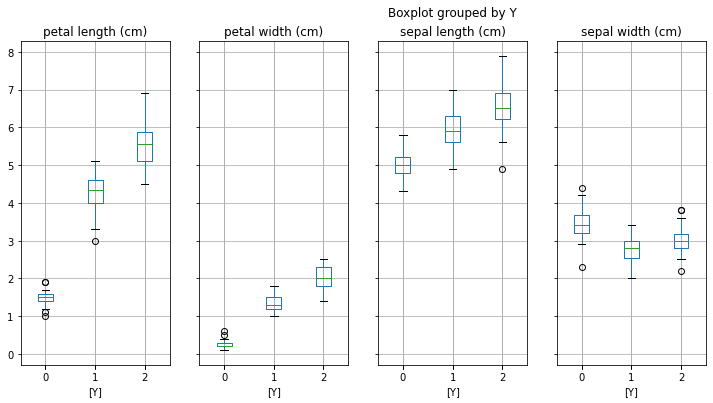

In [9]:
# Using the column that stores the type of flower in by argument

iris_df.boxplot(by = 'Y', layout = (1,5), figsize=(15,6) )
plt.show()

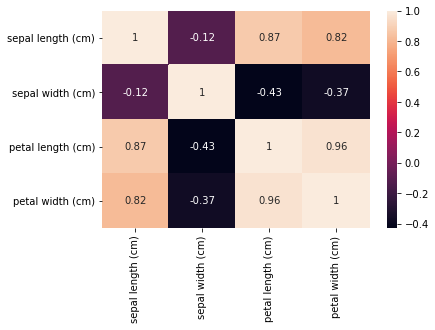

In [10]:
#Lets look at the correlation between the features

sns.heatmap(iris_df[column_names].corr(), annot = True)

From the correlation heatmap the following can be inferred:

1. Petal length and Sepal length has strong positive correlation
2. Petal Width has a strong positive correlation with Sepal lenght and Petal length

### Implementing PCA with two components



In [14]:
#imporing PCA libraries from decomposition Dimensionality reduction package
from sklearn.decomposition import PCA

#setting the number of components to keep
pca = PCA(n_components = 2)

#using fit_transform method to fit the model and apply dimensionality reduction on iris_pca
#only the fetaure columns are given as inputs for dimentioality reduction
iris_pca = pca.fit_transform(iris_df[column_names])

#storing the output as a dataframe
iris_pca = pd.DataFrame(iris_pca)

#adding column names for the iri_pca dataframe
iris_pca.columns = ['X1', 'X2']

#adding target column to the data frame
iris_pca["target"] = iris_y



In [15]:
#transformed data sample
iris_pca.head(3)

,X1,X2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0


### Developing a function that will  generate a scatterplot with target column as the hue from the embedding dataframe.

In [16]:
# A function that takes a dataframe of embeddings.

def plot_scatter(i_df):
    plt.figure(figsize = (7,7))
    
    #using iloc to reduce dependency on columns names
    sns.scatterplot(x=i_df.iloc[:,0],y=i_df.iloc[:,1],data=i_df,hue='target',palette="Set2")


### Call the above function with the pca embedding dataset to generate the visualisation

PCA embeddings visualised over target types



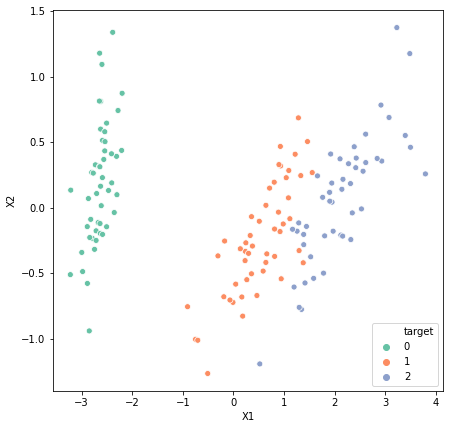

In [17]:
print("PCA embeddings visualised over target types")
print()

plot_scatter(iris_pca)

In [18]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

Principal component 1 provide 92% variance, 
together with Principal component 2 it provides 97% variance

### Implementing tSNE with 2 components and generate the plot by calling the above function (3 marks)


In [19]:
# initialise the tSNE object

#importing libraries for TSNE

from sklearn.manifold import TSNE

#setting number of components to keep as 2
tsne = TSNE(n_components=2)


In [20]:
#using fit_transform method to fit the model and apply transformation to iris_df
iris_tsne = tsne.fit_transform(iris_df[column_names])

#converting the output as dataframe
iris_tsne = pd.DataFrame(iris_tsne) 

In [21]:
iris_tsne.head()

,0,1
0,19.833372,-10.781890
1,17.257977,-10.190361
2,17.419279,-11.243068
3,17.001015,-10.990566
4,19.896383,-11.169123


In [22]:
# assigning column names and add target column

iris_tsne.columns = ['X1', 'X2']
iris_tsne["target"] = iris_y

In [23]:
iris_tsne.head()

,X1,X2,target
0,19.833372,-10.781890,0
1,17.257977,-10.190361,0
2,17.419279,-11.243068,0
3,17.001015,-10.990566,0
4,19.896383,-11.169123,0


tSNE embeddings visualized over target types


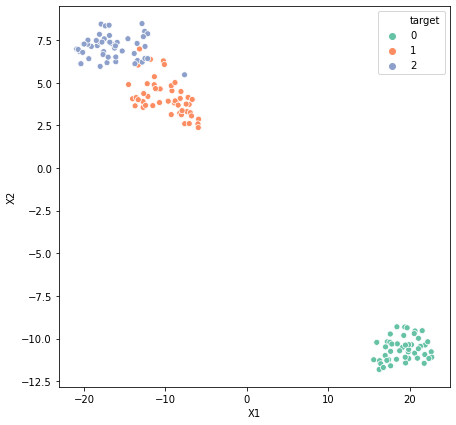

In [24]:
# calling the visualizationfunction above for tsne results

print("tSNE embeddings visualized over target types")
#calling the function to plot the output colored by target variable

plot_scatter(iris_tsne)